In [1]:
# packages
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import xarray as xr
import matplotlib
import matplotlib.pyplot as plt
import os, glob
#from pyfunctions import *
import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point

from utils.pyfunctions import *

In [2]:
# Setup your PBSCluster
import dask
from dask_jobqueue import PBSCluster
from dask.distributed import Client
ncores=1
nmem='10GB'
cluster = PBSCluster(
    cores=ncores, # The number of cores you want
    memory=nmem, # Amount of memory
    processes=1, # How many processes
    queue='casper', # The type of queue to utilize (/glade/u/apps/dav/opt/usr/bin/execcasper)
    local_directory='$TMPDIR', # Use your local directory
    resource_spec='select=1:ncpus='+str(ncores)+':mem='+nmem, # Specify resources
    project='P93300641', # Input your project ID here
    walltime='01:00:00', # Amount of wall time
    #interface='ib0', # Interface to use
)

# Scale up
cluster.scale(10)

# Setup your client
client = Client(cluster)

In [3]:
dvs = ['FLDS','FSDS','RH2M','RAIN','SNOW','TSA',
            'FGR12','FIRE','FSR','FSH','EFLX_LH_TOT',
            'SOILWATER_10CM','TSOI','H2OSNO','QVEGE','QVEGT','QSOIL','QRUNOFF',
            'TOTSOMC_1m','AR','HR','NEE','NBP','TLAI','GPP','TOTVEGC',
            'FAREA_BURNED','FSA', 'FFIX_TO_SMINN', 'TREFMXAV', 'TREFMNAV', 'NPP']

In [4]:
yy = (1986,2005)
dir='/glade/campaign/cgd/tss/projects/PPE/ctsm530_OAAT/hist/'
key = './clm6_minioaat.csv'
exp='oaat'
tape='h0'
utils_path = '/glade/u/home/linnia/CLM6-PPE/clm6-oaat/utils/'

In [5]:
ds= get_exp(exp,dir,key,dvs,'h0',yy,utils_path)


In [8]:
df = pd.read_csv(key)

In [18]:
default = ds.isel(ens=100)

In [44]:
tmp = default['TSOI']
da = get_map(tmp)
default_h0_map = da.to_dataset()

for var in dvs:
    tmp = default[var]
    default_h0_map[var] = get_map(tmp)

In [45]:
default_h0_map

<xarray.Dataset>
Dimensions:         (lat: 96, lon: 144, levgrnd: 25, time: 240)
Coordinates:
    gridcell        (lat, lon) int64 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0
  * levgrnd         (levgrnd) float32 0.01 0.04 0.09 0.16 ... 19.48 28.87 42.0
  * time            (time) object 1986-01-01 00:00:00 ... 2005-12-01 00:00:00
  * lon             (lon) float64 0.0 2.5 5.0 7.5 ... 350.0 352.5 355.0 357.5
  * lat             (lat) float64 -90.0 -88.11 -86.21 ... 86.21 88.11 90.0
Data variables: (12/32)
    TSOI            (time, levgrnd, lat, lon) float32 nan nan nan ... nan nan
    FLDS            (time, lat, lon) float32 nan nan nan nan ... nan nan nan nan
    FSDS            (time, lat, lon) float32 nan nan nan nan ... nan nan nan nan
    RH2M            (time, lat, lon) float32 nan nan nan nan ... nan nan nan nan
    RAIN            (time, lat, lon) float32 nan nan nan nan ... nan nan nan nan
    SNOW            (time, lat, lon) float32 nan nan nan nan ... nan nan nan nan
    ...              ...
    FAREA_BURNED    (time, lat, lon) float32 nan nan nan nan ... nan nan nan nan
    FSA             (time, lat, lon) float32 nan nan nan nan ... nan nan nan nan
    FFIX_TO_SMINN   (time, lat, lon) float32 nan nan nan nan ... nan nan nan nan
    TREFMXAV        (time, lat, lon) float32 nan nan nan nan ... nan nan nan nan
    TREFMNAV        (time, lat, lon) float32 nan nan nan nan ... nan nan nan nan
    NPP             (time, lat, lon) float32 nan nan nan nan ... nan nan nan nan

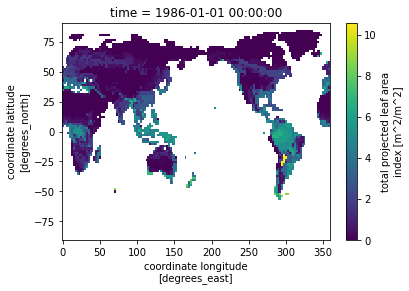

In [48]:
default_h0_map.TLAI.isel(time=0).plot()

In [49]:
default_h0_map.to_netcdf('/glade/work/linnia/ILAMB/ILAMB/ILAMB_data/MODELS/ctsm5.3/ctsm53ppe_default.nc',unlimited_dims='time')